## Name: Yusuf Elnady

# Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import random
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

# Q1

In [2]:
df = pd.read_csv('data_Question_1&2/citibike.csv')
start_stations = df['start station id']
end_stations = df['end station id']

#Building nodes, I put them in set to be unique
stations = {}
stations.update(start_stations)
stations.update(end_stations)

In [3]:
#(1.a)
# build an undirected graph from all connected stations
edge_list = list(zip(start_stations, end_stations))
G = nx.Graph(edge_list)
n_nodes = G.number_of_nodes()
print("Number of Nodes from the Graph is ",n_nodes)  #G.order()

Number of Nodes from the Graph is  329


In [4]:
#(1.b)
n_edges = G.number_of_edges()
print("Number of Edges from the Graph is ",n_edges) #G.size()

Number of Edges from the Graph is  27060


In [5]:
#(1.c)
#Getting all degrees info and sorts them
degrees_sorted =  sorted([d for n, d in G.degree()], reverse=True)
print("The maximum degree is",degrees_sorted[0])
print("The minimum degree is",degrees_sorted[n_nodes-1])
#The problem is that we may be counting edges two times since it's an undirected graph
print("The average degree is", np.mean(degrees_sorted) )
print(nx.info(G))

The maximum degree is 287
The minimum degree is 6
The average degree is 164.49848024316108
Name: 
Type: Graph
Number of nodes: 329
Number of edges: 27060
Average degree: 164.4985


In [6]:
#(1.d)
nodes_degree_6_or_more = len(list(filter(lambda x: x > 5, G.nodes())))
print("The number of nodes with more than 5 edges is",nodes_degree_6_or_more)

The number of nodes with more than 5 edges is 329


In [7]:
#(1.e)
# The "mean path length" is the "average shortest path" between two nodes.
print("The mean length is ",nx.average_shortest_path_length(G))

The mean length is  1.505226480836237


# Q2

Centrality : The degree centrality for a node v is the fraction of nodes it is connected to , normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.

Betweenness Centrality:number of times a node acts as a bridge along the shortest path between two other nodes.

Closeness Centrality: of a node u is the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes.  Since the sum of distances depends on the number of nodes in the graph, closeness centrality is normalized by the sum of minimum possible distances n-1.

In [8]:
#(2.a)
#Centrality : The degree centrality for a node v is the fraction of nodes it is connected to ,
#normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.
centrality = nx.degree_centrality(G)
x_centrality ,y_centrality = centrality.keys(),centrality.values()

#Betweenness_centrality:number of times a node acts as a bridge along the shortest path between two other nodes.
betweenness_centrality = nx.betweenness_centrality(G)
x_betweenness_centrality, y_betweenness_centrality = betweenness_centrality.keys(),betweenness_centrality.values()

#closeness_centrality: of a node u is the reciprocal of the sum of the shortest path distances from u to all n-1 other nodes. 
# Since the sum of distances depends on the number of nodes in the graph,
# closeness_centrality is normalized by the sum of minimum possible distances n-1.

closeness_centrality = nx.closeness_centrality(G)
x_closeness_centrality , y_closeness_centrality = closeness_centrality.keys(),closeness_centrality.values()               

Text(0.5, 1.0, 'Closeness Centrality')

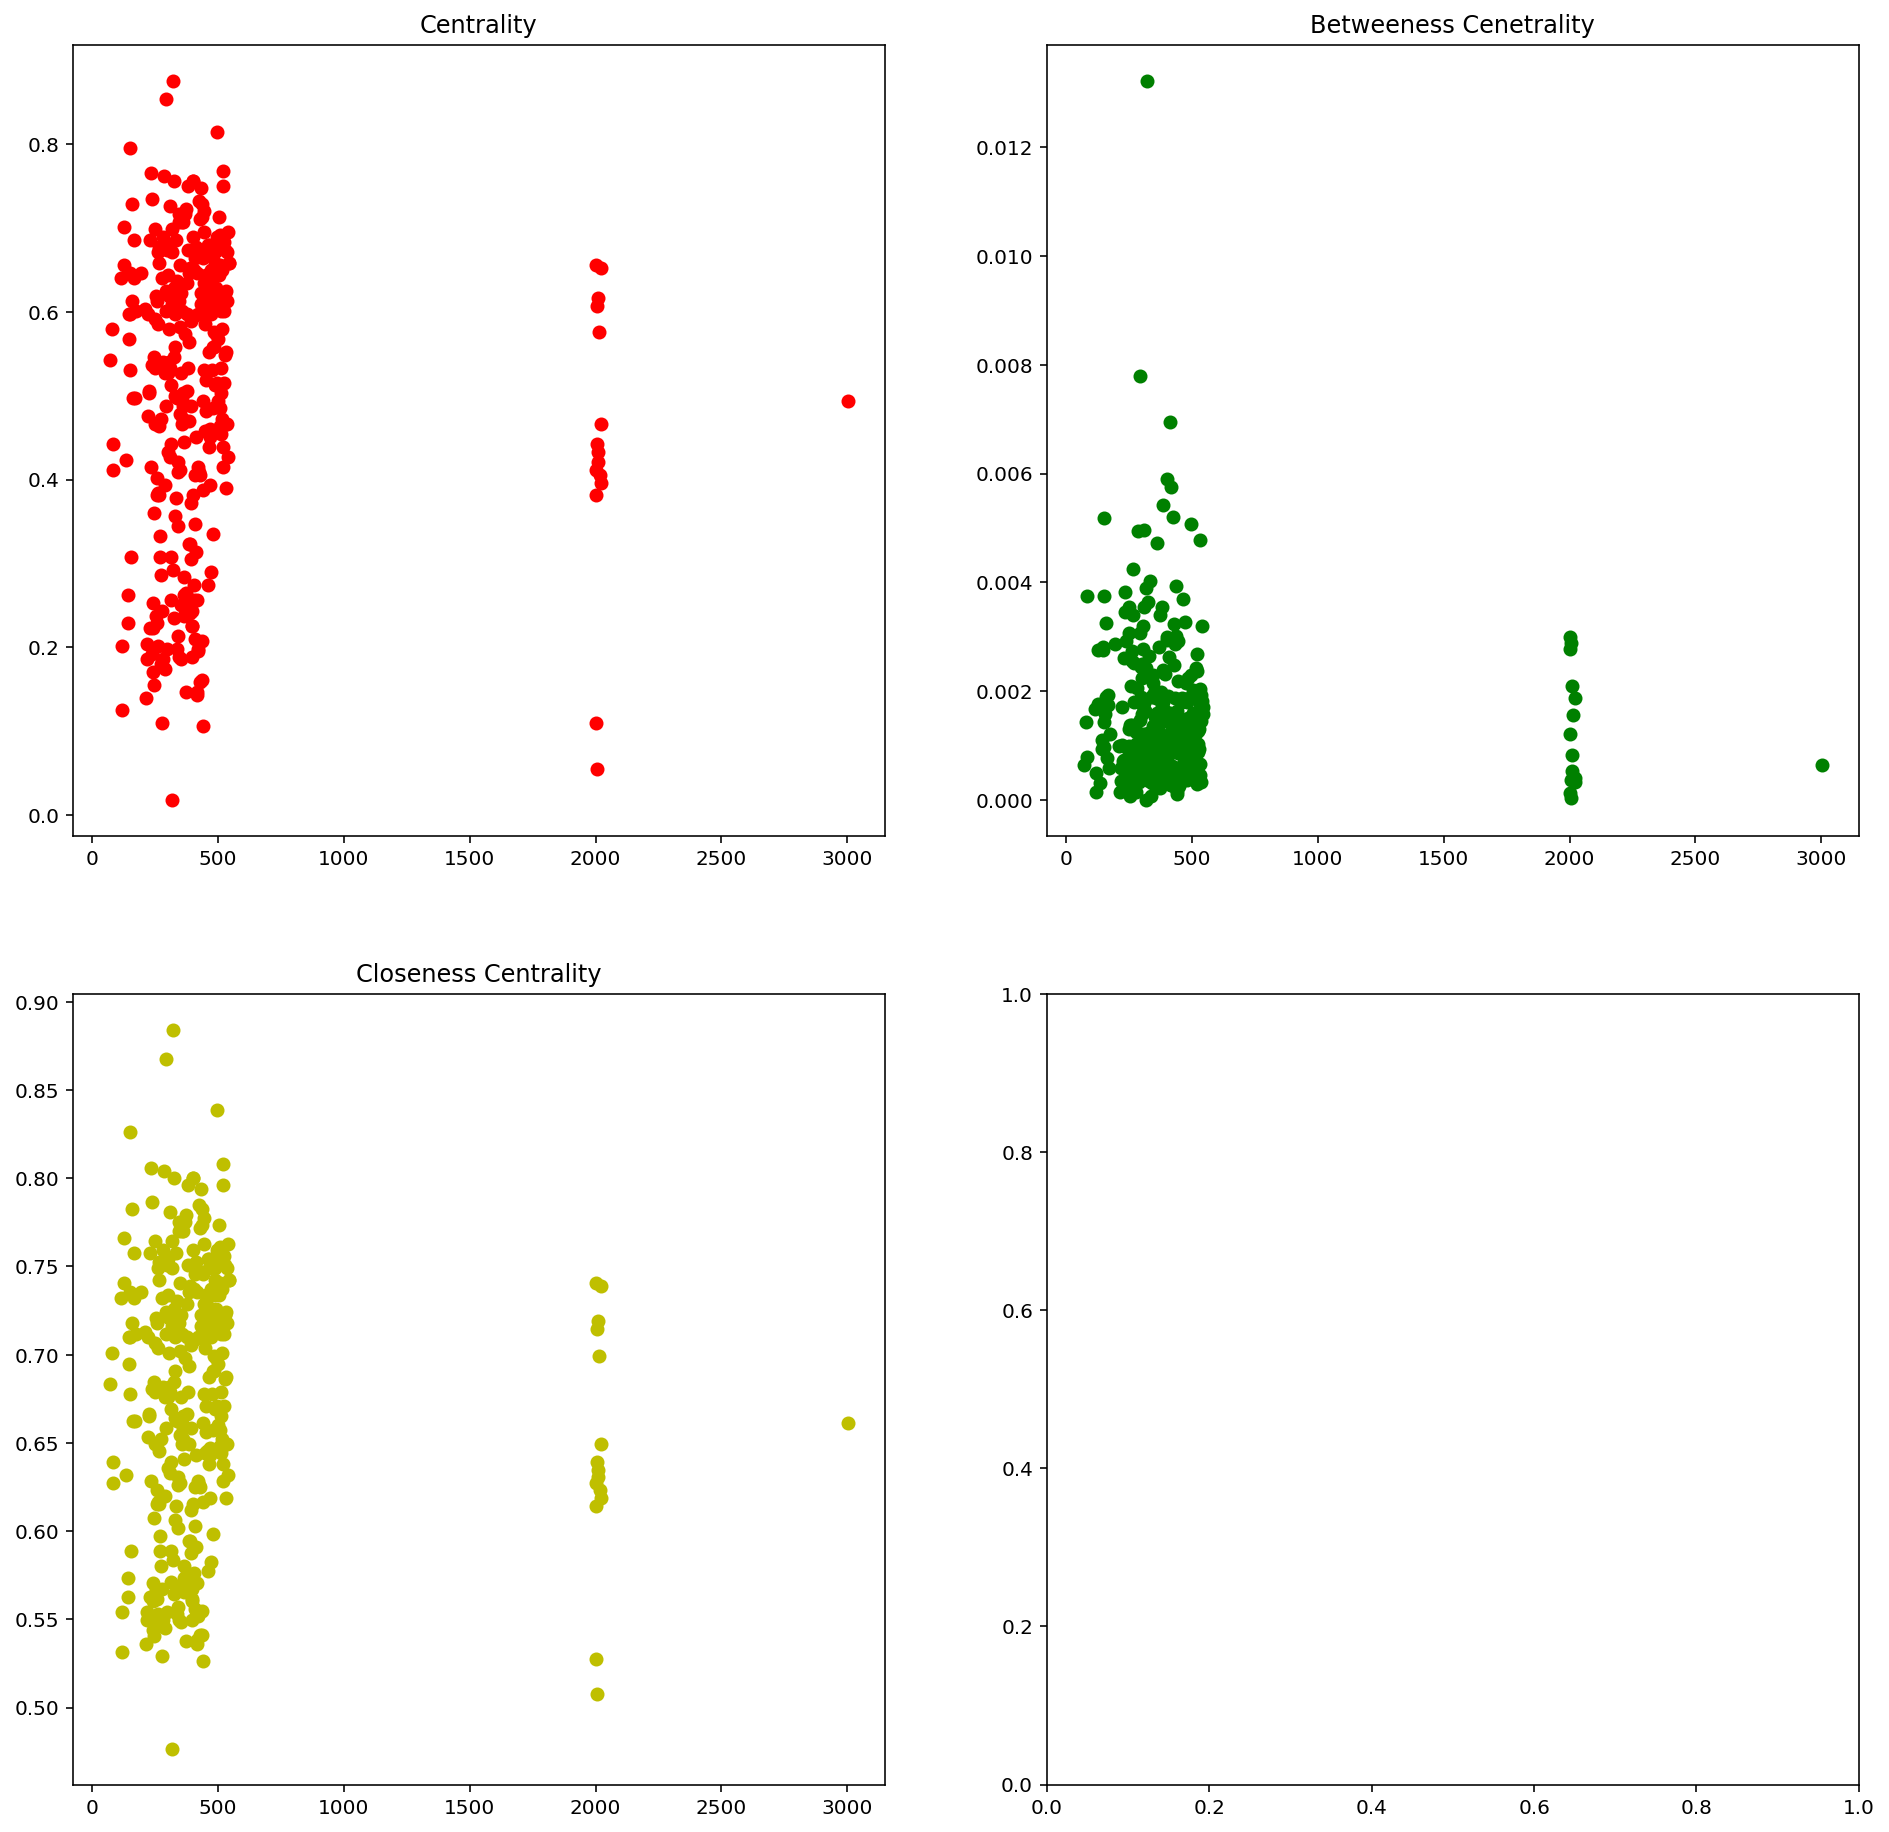

In [9]:
fig, axs = plt.subplots(2, 2,figsize=(16,16))
fig.grid=True
axs[0, 0].plot(list(x_centrality),list( y_centrality),'ro' )
axs[0, 0].set_title('Centrality')
axs[0, 1].plot(list(x_betweenness_centrality),list(y_betweenness_centrality),'go')
axs[0, 1].set_title('Betweeness Cenetrality')
axs[1, 0].plot(list(x_closeness_centrality),list( y_closeness_centrality),'yo')
axs[1, 0].set_title('Closeness Centrality')

True

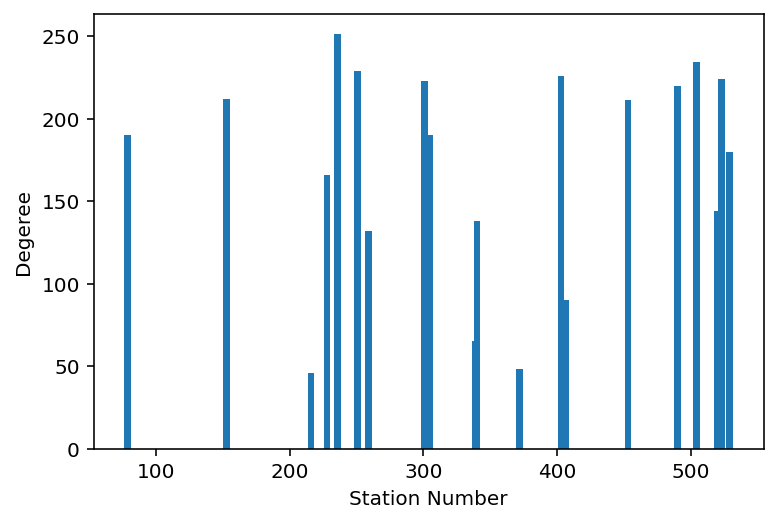

In [20]:
#(2.b)

nodes_20 = random.choices(list(G.degree()), k=20)

x, y = zip(*nodes_20)
plt.bar(x,y,width = 5)
plt.xlabel('Station Number')
plt.ylabel('Degeree')

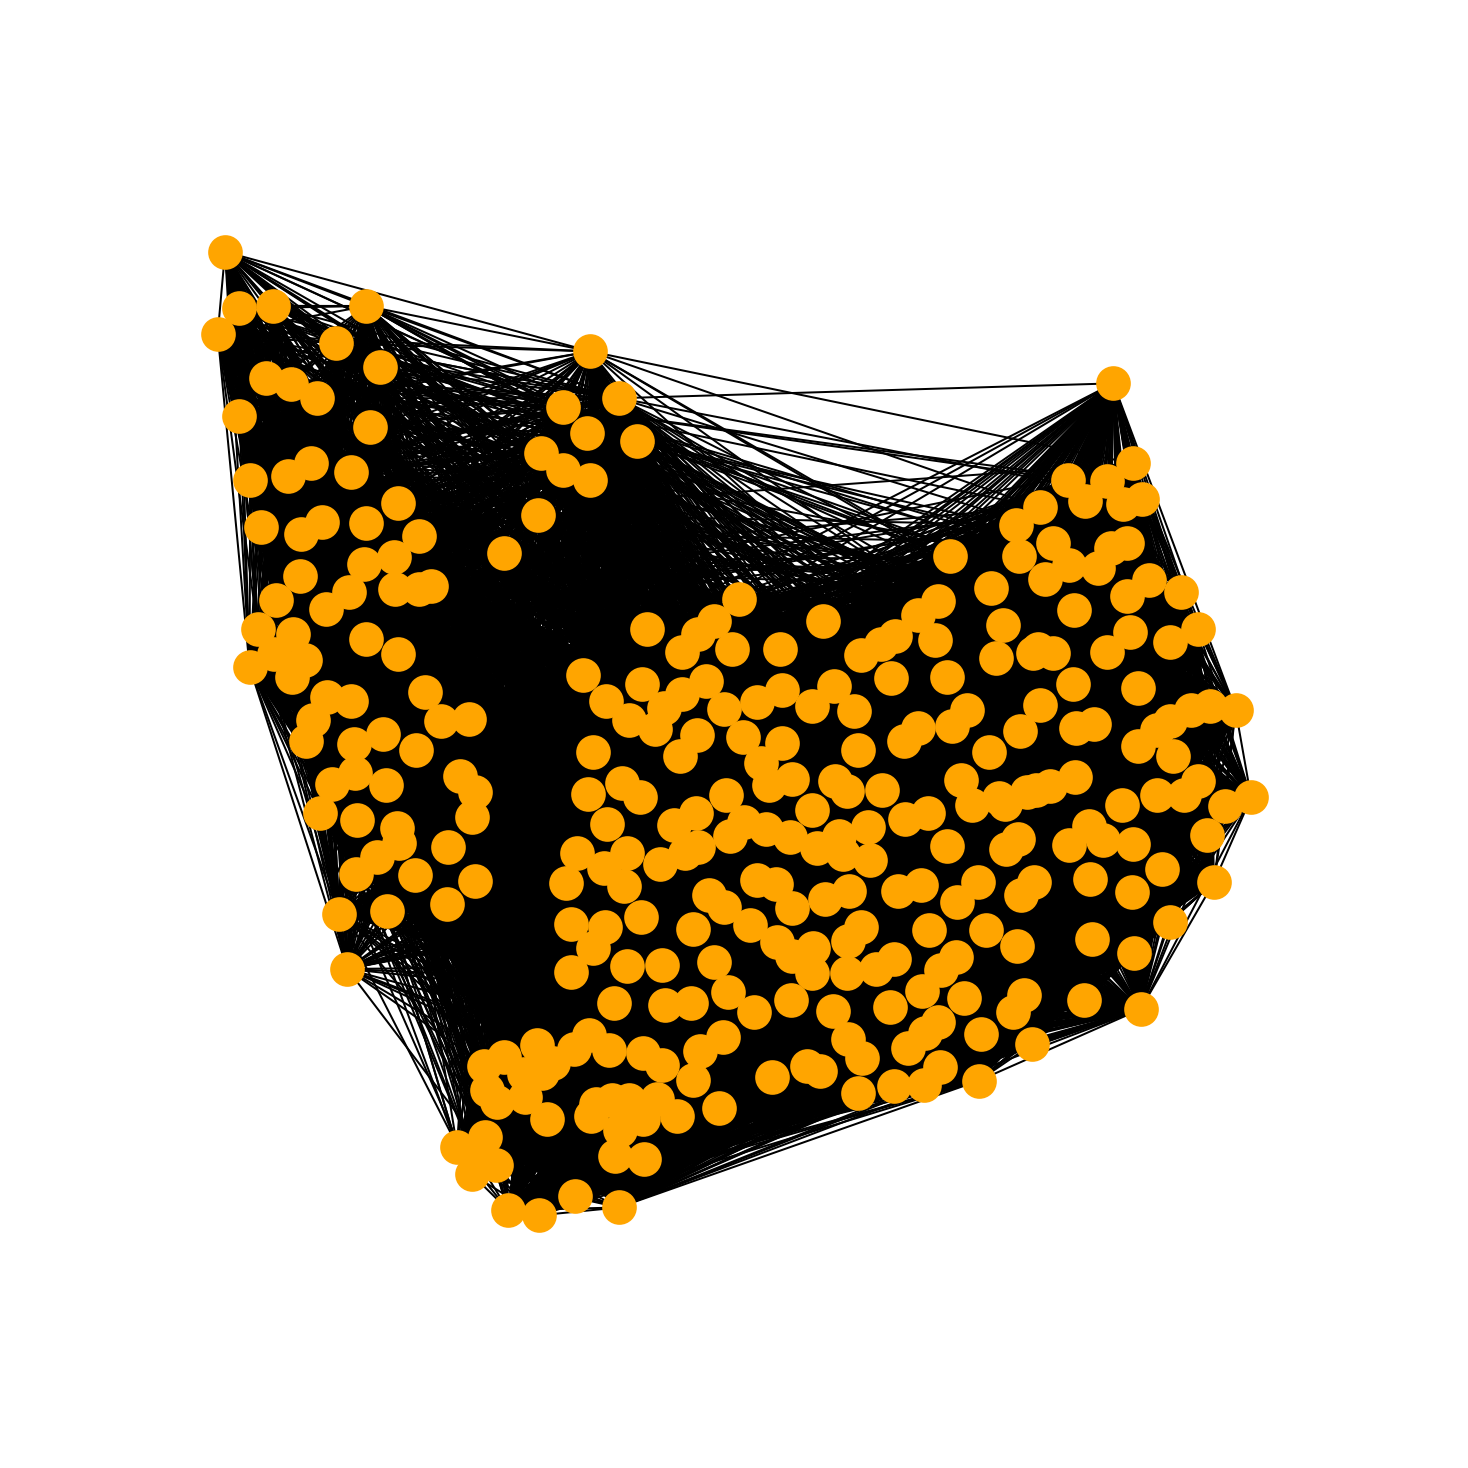

In [11]:
#(2.c)

#create a dictionary of this format # {1: (20, 5), 2: (-4, 10.5), 3: (17, -5)}
pos = {}
for station in df['start station id'].unique(): #329 node
    station_rows = (df['start station id']==station)
    latitude = df[station_rows]['start station latitude'].unique()[0]
    longitude = df[station_rows]['start station longitude'].unique()[0]
    pos.update({station:(latitude,longitude )})
plt.figure(1,figsize=(10,10))
nx.draw(G,pos=pos,edge_color='black',node_color='orange',linewidths=0.01)

The observation from the plot: All bike stations are highly connected to each other. From the graph, and based on the Geo-location of the stations, we can see that the stations can be grouped into almost three groups/subgraphs that are all linked. Given this plot, most of the edges are not clear to be viewed given, and that's due to the large number of connections between stations and each other. There's also the right group that has the many stations on it, so that means that most of the influence in the network will come from this subgraph. 

## (2.d) Analyzing the data

First, I tried to plot the degree distribution histogram for all stations, and I found that most of the trips (the degree of a node) are centralized on the stations that are from stations 72 to station 546. There are some outliers stations but they also have a high number of trips, namely from station #2000 to #3002. Also from a geographical point of view, from Q2.c we can see that the stations are divided based on their location into three components that are highly connected to each other and that can be seen visually from the plotting the stations and their edges/connections based on their Geo-locations.  

From the centrality measures and plots I got in Q2.b, in the degree centrality again most of the points are on the left hand side due to the stations names, and it can be interpreted that fraction of nodes connected to a given node is approximately between 0.1 and 0.75. Those stations with high degree centrality have the most trips coming from and to and has the most  influence on the network. The same for closeness centrality which has more compact range than the degree centrality, and that means how short the shortest paths are from node i to all nodes, and in this case it means that there's a fast flow of trips of bikes given one station to all other stations. In contrast to all of them, we find the betweenness centrality to be very low, just from 0 to 0.008 (ignoring the one outlier we have). That's interpreted as there's only a small chance that a stations acts  acts as a bridge along the shortest path between two other stations, and we can infer that most of the trips goes from the start station station to the end station directly without crossing by the other stations.

In our network, we have unweighted graphs, so the clustering of a node is the fraction of possible triangles through that node that exist (i.e. a measure of the degree to which nodes in a graph tend to cluster together). From the data I got, the global clustering coefficient is 0.687, which is a high number and in the same way we find the transitivity of the graph which is based on the relative number of triangles in the graph, compared to total number of connected triples of nodes.

Finally, by running a Networkx is_connected() function, we see that our network is connected and there's a path between every pair of station. So, starting from any station you can reach any other station you want.

# Q3

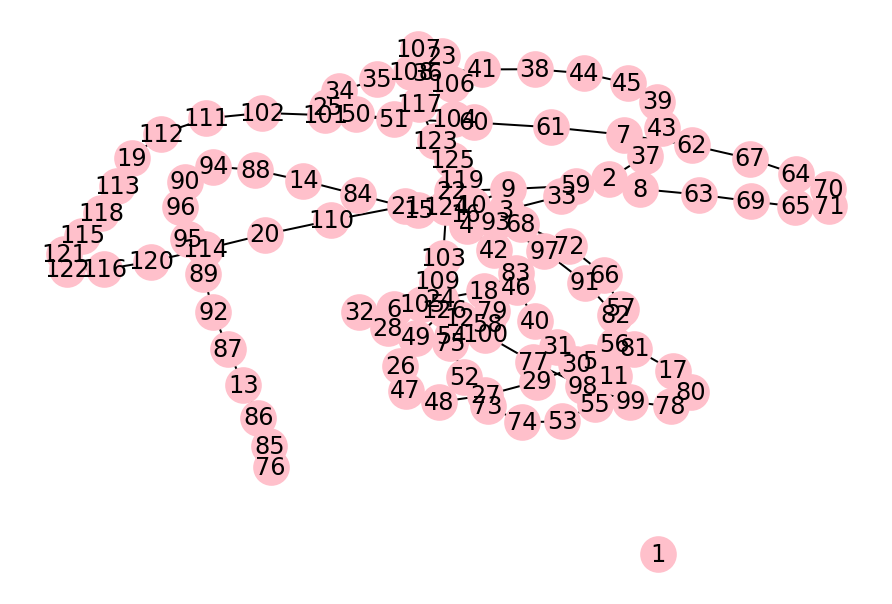

In [12]:
labeled_nodes = pd.read_csv('data_Question_3/labelednodes.txt', sep=" ", header=None, names = ['Node','Label'])
ground_truth  = pd.read_csv('data_Question_3/groundtruth.txt', sep=" ", header=None,  names = ['Node','Label'])
edges_df = pd.read_csv('data_Question_3/Edges.txt', sep=" ", header=None, names = ['Start','End'])

G3 = nx.Graph()

# First we need to construct a list of nodes along with its Probabilities as following
# [ (4, {"prob": "red"}), (5, {"color": "green"}), ])
# If belongs to class 1 then it's probability (0)
# If belongs to class 2 then it's probability (1)
# If unlabeled node then it's probability (0.5)
# Making a list of nodes along with their probs (1 or zero only)
nodes_probs = []
for node,label in zip(labeled_nodes['Node'], labeled_nodes['Label']):
    nodes_probs.append((node,{"prob": 1 if label == 2 else 0}))
    
for node in ground_truth['Node']:
    nodes_probs.append((node,{"prob": 0.5}))
    
G3.add_nodes_from(nodes_probs)

# List of Pairs (a node with its other node)
edges_list = list(zip(edges_df['Start'],edges_df['End']))
G3.add_edges_from(edges_list)

unlabeled_nodes = ground_truth['Node'].to_list()
actual_classes = dict(zip(ground_truth['Node'],ground_truth['Label']))

##nx.draw_circular(G3,node_color='pink', edge_color='black',linewidths=1,with_labels=True)
nx.draw(G3,node_color='pink', edge_color='black',linewidths=1,with_labels=True)
#nx.info(G3)

In [13]:
n_iterations = 5
for _ in range(n_iterations): #defined number of iterations or untill convergence (that is no class node is changing)
    #iterate randomly over the nodes in each iteration
    random.shuffle(unlabeled_nodes)
    for node in unlabeled_nodes:
        # get nodes connected to this node
        edges_of_node = G3.edges(node)
        prob = 0
        
        # From all connected nodes to it, calculate the formula P(C|node)
        for edge in edges_of_node:
            node_idx = edge[1]
            prob += (0.5) * (G3.nodes[node_idx]['prob'])
        prob = prob/((0.5)*len(edges_of_node)) #normalize by number of edges connected to this node
        
        # Update the unlabeled_node probability
        G3.nodes[node]['prob'] = prob
        

In [17]:
# Getting the predicted_classes
predicted_classes = {}
for unlabeled_node in unlabeled_nodes:
    predicted_prob = (G3.nodes[unlabeled_node]['prob'])
    if (predicted_prob>=0.5): #means this node is classified to be (2)
        print("The predicted class for node",unlabeled_node,"is",2)
        predicted_classes.update({unlabeled_node:2}) 
    else: 
        print("The predicted_class for node",unlabeled_node, "is",1)
        predicted_classes.update({unlabeled_node:1}) 
            

The predicted_class for node 22 is 1
The predicted_class for node 24 is 1
The predicted_class for node 110 is 1
The predicted class for node 23 is 2
The predicted class for node 111 is 2
The predicted class for node 113 is 2
The predicted_class for node 112 is 1


In [15]:
# calculating accuracy
acc = 0
for unlabeled_node in unlabeled_nodes: 
    predected_y = predicted_classes[unlabeled_node]
    actual_y = actual_classes[unlabeled_node]
    acc += (actual_y == predected_y)
        
print(acc/len(unlabeled_nodes)*100,'%')

57.14285714285714 %
